In [1]:
import torch

import tr_util
import util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
%load_ext autoreload
%autoreload 2

In [16]:
default_path = 'results/min_tree_ppo/node/'
# default_path = 'results/min_tree_ppo/node_cuda/'
agent_path = '250414_1811#n10_e33_g25_6-2e2'
correl_path = f'{default_path}{agent_path}'

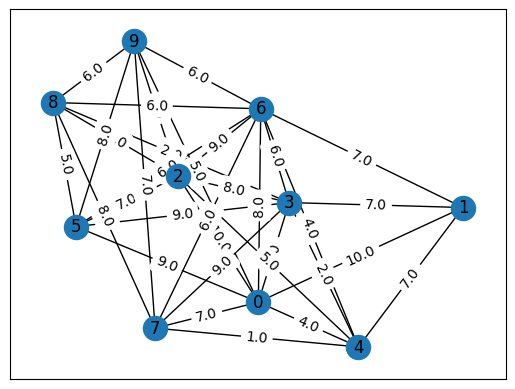

,0,1,2,3,4,5,6,7,8,9
iter,,,,,,,,,,
0,127,96,104,133,109,120,139,115,103,106
1,133,98,127,109,107,110,144,110,101,113
2,117,92,116,128,120,109,124,118,121,107
3,125,90,110,143,124,113,125,110,106,106
4,142,89,111,138,105,104,135,108,103,117
...,...,...,...,...,...,...,...,...,...,...
995,137,90,121,123,107,112,147,103,112,100
996,127,101,115,127,121,110,128,114,108,101
997,124,98,108,147,106,108,140,101,110,110


In [17]:
actions_df = pd.read_csv(f'{correl_path}/actions_debug.csv', index_col=0)
graph = torch.load(f'{correl_path}/graph.pt', weights_only=False)
# graph = torch.load(f'graphs/graph50_n50_e1225_corr.pt', weights_only=False)
util.show_data(graph)
actions_df

In [18]:
degrees = util.get_out_edges(graph)
torch.stack([graph.x[:, 0], degrees])

tensor([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
        [8., 4., 7., 8., 6., 6., 9., 6., 6., 6.]])

In [19]:

degrees.unique().shape

torch.Size([5])

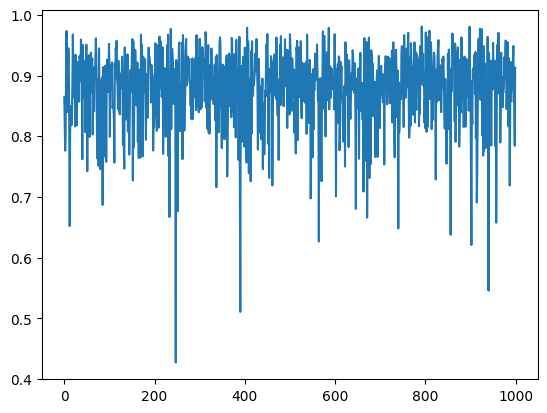

In [20]:


correlations = []
for _, row in actions_df.iterrows():
    corr, _ = pearsonr(degrees, row)
    correlations.append(corr)
plt.plot(correlations)

In [21]:
correlations[0]

0.8643048128565578